Fazer uma lista de mas praticas de questionarios...

In [120]:
%matplotlib inline
import pylab as pl
import numpy as np

In [121]:
f = open('RespostaQuestionárioMulheresnaCiência.csv', 'r')

maxNumElem = 0
maxElemSize = 0
Answers = []
for line in f:
    lspl = line.split('|')
    Answers.append( lspl )
    if maxNumElem < len( lspl ): maxNumElem = len( lspl ) 
    for item in lspl:
        if maxElemSize < len(item): maxElemSize = len(item)

data = np.chararray( ( len(Answers)+1,15), itemsize=maxElemSize )
data[:] = ''
j=0
for answer in Answers:
    j += 1
    k = 0
    for item in answer:
        data[j,k] = item
        k += 1

Showing index of each question

In [122]:
for j in range(data.shape[1]):
    print j, data[1,j][:50]

0 Indicação de data e hora
1 Qual o seu gênero?
2 Qual a sua universidade?
3 Qual o seu instituto?
4 Qual o seu ano de ingresso na universidade?
5 Quantas mulheres entraram no seu curso no seu ano 
6 Quantas ainda continuam no curso? Caso tenha concl
7 Na sua opinião, a presença de mulheres no seu cu
8 Você acredita que homens possuem vantagens sobre 
9 Você diria que existe qualquer tipo de segregaç�
10 Você ou alguém próximo a você já sofreu algum
11 Você acha que a questão de assédio e discrimina
12 Escreva aqui comentários/sugestões caso deseje.
13 Qual o seu curso?
14 


Fixing the data...

In [128]:
data[122,4] = '2008'
data[149,4] = '0'

### Number of female and male responses

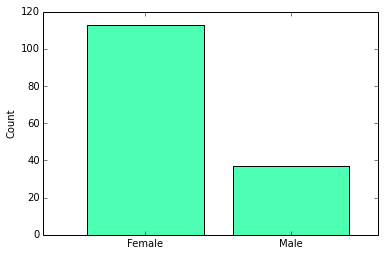

In [307]:
genCounting = [ data[ data[:,1] == 'Feminino' ].shape[0] , data[ data[:,1] == 'Masculino' ].shape[0] ]

pl.bar( [0.5,1.5], genCounting, color=(0.3,1.0,0.7) )

pl.xlim(0.2,2.5)
pl.xticks([0.9,1.9], ['Female', 'Male'])
pl.ylabel('Count')
pl.show()

### Year they attended college

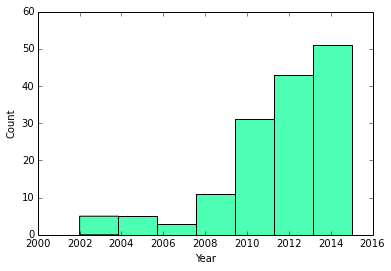

In [149]:
years = np.array( data[2:,4], dtype=int)
years = years[years>0]  #eliminating ill-data

pl.hist(years, 7,  color=(0.3,1.0,0.7))

pl.xlim(years.min()-2, 2016)
pl.xlabel('Year')
pl.ylabel('Count')
pl.show()

### Number of women in their classes

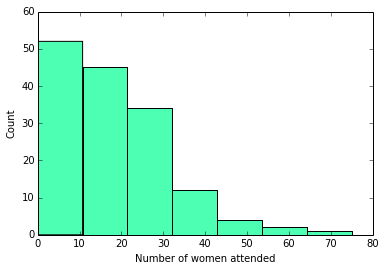

In [244]:
gIN = data[2:,5]
gIN[gIN == 'metade da sala, aproximadamente 36 mulheres.'] = '36'
gIN[gIN == '30 (metade da turma)'] = '30'
gIN[gIN == 'Entre 15-20'] = '17'
gIN[gIN == '~25'] = '25'
gIN[gIN == 'entre 8 e 10'] = '9'
gIN[gIN == 'Aproximadamente 3/4 de uma turma de 35 pessoas'] = '26'
gIN[gIN == 'em torno de 8'] = '8'
gIN[gIN == 'Aproximadamente 20'] = '20'
gIN[gIN == 'por volta de 8'] = '8'
gIN[gIN == '11 de 60'] = '11'
gIN[gIN == '55 de 75'] = '55'
gIN[gIN == 'Aproximadamente metade da turma de 60 pessoas'] = '30'

pl.hist(np.array(gIN, dtype=int), 7,  color=(0.3,1.0,0.7))

pl.xlabel('Number of women attended')
pl.ylabel('Count')
pl.show()

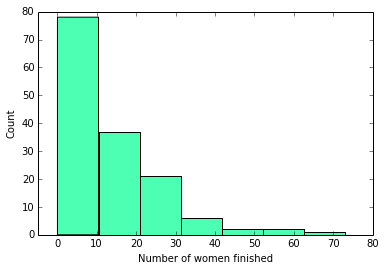

In [256]:
gOUT = data[2:,6]
gOUT[gOUT == '25 +/-'] = '25'
gOUT[gOUT == 'aproximadamente 30'] = '30'
gOUT[gOUT == 'nao se aplica'] = '-10'
gOUT[gOUT == 'Acho que umas 53, n\xc3\xa3o tenho certeza.'] = '53'
gOUT[gOUT == 'N\xc3\xa3o sei'] = '-10'
gOUT[gOUT == '2 se formaram'] = '2'
gOUT[gOUT == '8 continuam no curso'] = '8'
gOUT[gOUT == 'por volta de 6'] = '6'
gOUT[gOUT == '7, ainda nenhuma se formou'] = '7'
gOUT[gOUT == 'Aproximadamente 20'] = '20'
gOUT[gOUT == 'em torno de 8'] = '8'
gOUT[gOUT == ''] = '-10'
gOUT[gOUT == '-'] = '-10'
gOUT[gOUT == '~15'] = '15'
gOUT[gOUT == 'Todas continuam'] = '10'
gOUT[gOUT == 'Todas se formaram no per\xc3\xadodo ideal, exceto as que fizeram interc\xc3\xa2mbio.'] = '10'
gOUT[gOUT == 'N\xc3\xa3o lembro de nenhuma que saiu do curso.'] = '30'
gOUT[47] = 7
gOUT[121] = 50

pl.hist(np.array(gOUT[np.array(gOUT, dtype=int) > -1], dtype=int), 7,  color=(0.3,1.0,0.7))

pl.xlabel('Number of women finished')
pl.xlim(-5,80)
pl.ylabel('Count')
pl.show()

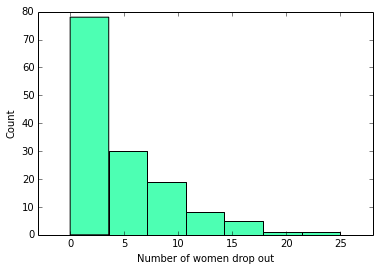

In [271]:
Delta = np.array(gIN[np.array(gOUT, dtype=int) > 0], dtype=int) - \
        np.array(gOUT[np.array(gOUT, dtype=int) > 0], dtype=int)

pl.hist(Delta[Delta >= 0], 7,  color=(0.3,1.0,0.7))

pl.xlabel('Number of women drop out')
pl.ylabel('Count')
pl.xlim(-3,28)
pl.show()

### Você ou alguém próximo a você já sofreu algum (...)

In [276]:
PosAns = {
    1 : 'Sim, j\xc3\xa1 sofri algum tipo de discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio sutil durante a universidade',
    2 : 'Sim, j\xc3\xa1 sofri discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio expl\xc3\xadcito durante a universidade',
    3 : 'Sim, algu\xc3\xa9m pr\xc3\xb3ximo a mim j\xc3\xa1 sofreu algum tipo de discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio sutil durante a universidade',
    4 : 'Sim, algu\xc3\xa9m pr\xc3\xb3ximo a mim j\xc3\xa1 sofreu discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio expl\xc3\xadcito durante a universidade',
    5 : 'Sim, eu e algu\xc3\xa9m pr\xc3\xb3ximo a mim j\xc3\xa1 sofremos algum tipo de discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio sutil durante a universidade',
    6 : 'Sim, eu e algu\xc3\xa9m pr\xc3\xb3ximo a mim j\xc3\xa1 sofremos discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio expl\xc3\xadcito durante a universidade',
    7 : 'N\xc3\xa3o, nunca sofri e ningu\xc3\xa9m pr\xc3\xb3ximo a mim sofreu nenhum tipo de discrimina\xc3\xa7\xc3\xa3o/ass\xc3\xa9dio durante a universidade'
}

In [283]:
RCons = np.zeros((7,1))
for j in range(1,8):
    RCons[j-1] = data[ data[:,10] == PosAns[j] ].shape[0]

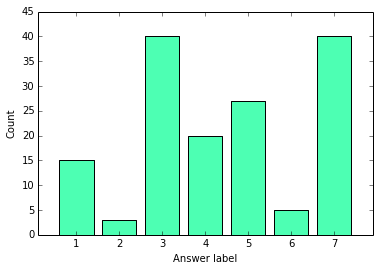

In [294]:
pl.bar( np.array(range(7)) + 0.6, RCons, color=(0.3,1.0,0.7) )
pl.xlim(0.1,7.9)
pl.xlabel('Answer label')
pl.ylim(0,45)
pl.ylabel('Count')
pl.show()

Separando essas respostas por genero

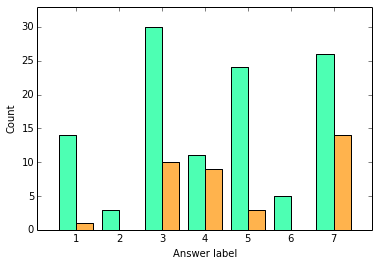

In [309]:
fRCons = np.zeros((7,1))
fdata = data[data[:,1] == 'Feminino']
for j in range(1,8):
    fRCons[j-1] = fdata[ fdata[:,10] == PosAns[j] ].shape[0]

mRCons = np.zeros((7,1))
mdata = data[data[:,1] == 'Masculino']
for j in range(1,8):
    mRCons[j-1] = mdata[ mdata[:,10] == PosAns[j] ].shape[0]

pl.bar( np.array(range(7)) + 0.6, fRCons, 0.4, color=(0.3,1.0,0.7) )
pl.bar( np.array(range(7)) + 1.0, mRCons, 0.4, color=(1.0,0.7,0.3) )
pl.xlim(0.1,7.9)
pl.xlabel('Answer label')
pl.ylim(0,33)
pl.ylabel('Count')
pl.show()

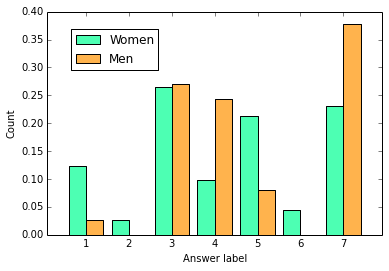

In [316]:
fRCons = np.zeros((7,1))
fdata = data[data[:,1] == 'Feminino']
for j in range(1,8):
    fRCons[j-1] = fdata[ fdata[:,10] == PosAns[j] ].shape[0] / float(genCounting[0])

mRCons = np.zeros((7,1))
mdata = data[data[:,1] == 'Masculino']
for j in range(1,8):
    mRCons[j-1] = mdata[ mdata[:,10] == PosAns[j] ].shape[0] / float(genCounting[1])

pl.bar( np.array(range(7)) + 0.6, fRCons, 0.4, color=(0.3,1.0,0.7), label='Women' )
pl.bar( np.array(range(7)) + 1.0, mRCons, 0.4, color=(1.0,0.7,0.3), label='Men' )
pl.xlim(0.1,7.9)
pl.xlabel('Answer label')
pl.ylabel('Count')
pl.legend(bbox_to_anchor=(0.35, 0.95))
pl.show()